In [1]:
#essential libraries
import pandas as pd                   #pandas does things with matrixes
import numpy as np                    #used for sorting a matrix
import matplotlib.pyplot as plt       #matplotlib is used for plotting data
import matplotlib.ticker as ticker    #used for changing tick spacing
import datetime as dt                 #used for dates
import matplotlib.dates as mdates     #used for dates, in a different way

from sklearn import preprocessing;
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model;

In [2]:
#importing dataset
df = pd.read_csv('../input/sandp500/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# understanding our dataset

The first step towards data analysis is to understand the data in hand. Its columns, max, min, count, null values, etc...

In [3]:
df.columns                     #prints just the columns of the matrix

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [4]:
df.info()                            #get information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
df.describe()                        #describe the dataset

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


# Missing values
In this section we will handle all the missing data in the dataset

In [6]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data                                                                         #this displays the matrix

,Total,Percent
date,0,0.000000
close,0,0.000000
volume,0,0.000000
Name,0,0.000000
high,8,0.001292
low,8,0.001292
open,11,0.001777


We observe that the total number of column with missing values is 8-27 which is less that 0.005% of the dataset.
It is convinient to get rid of the rows with missing value since the affect on the dataset will be very insignificant, but to avoid any issues since it is a time series analysis, we will forward fill the null values instead of dropping them.

In [7]:
df = df.ffill(axis=1)                                   #forward filling rows with a null cell


Let's check the missing data again

In [8]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data  

,Total,Percent
date,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0
Name,0,0.0


We observe that the total number of missing rows to be 11, making the total number of rows being deleted less than 0.002% of the dataset.

In [9]:
df = df.drop(df.loc[df['open'].isnull()].index)                                   #drops rows with a null cell in the open column
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data  

,Total,Percent
date,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0
Name,0,0.0


we have ***successfully*** cleared all missing data from our dataset

# Exploratory Data Analysis

Let's analyse, plot and work on different aspects of the project

In [10]:
len(df.Name.unique())                  #calculating total number of companies listed in the dataset

505

# Feature Extraction

In [11]:
# For the sake of visualization, Let's create extract year from the date column
df['year'] = pd.DatetimeIndex(df["date"]).year
df['month'] = pd.DatetimeIndex(df["date"]).month
df['date'] = pd.DatetimeIndex(df["date"]).date

In [12]:
df.tail()

,date,open,high,low,close,volume,Name,year,month
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,2018,2
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,2018,2
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,2018,2
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,2018,2
619039,2018-02-07,72.7,75,72.69,73.86,4534912,ZTS,2018,2


In [13]:
#Since the year 2017 is the most recent year with dataset of over 4 months, let's explore that
# Creating a ColumnDataSource instance to act as a reusable data source for ploting


In [14]:
df["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [15]:
#We'll focus on one
walmart = df.loc[df['Name'] == 'WMT']
walmart.head()

,date,open,high,low,close,volume,Name,year,month
595716,2013-02-08,71.2,71.64,71.07,71.48,5906823,WMT,2013,2
595717,2013-02-11,71.25,71.51,70.53,71.4,6202534,WMT,2013,2
595718,2013-02-12,71.49,71.66,71.1,71.4,4761910,WMT,2013,2
595719,2013-02-13,71.29,71.7,71.21,71.39,3969807,WMT,2013,2
595720,2013-02-14,71.1,71.23,70.755,70.82,6820952,WMT,2013,2


We need to make sure if the date column is either a categorical type or a datetype. In our case date is a categorical datatype so we need to change it to datetime.

In [16]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 595716 to 596974
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1259 non-null   object
 1   open    1259 non-null   object
 2   high    1259 non-null   object
 3   low     1259 non-null   object
 4   close   1259 non-null   object
 5   volume  1259 non-null   object
 6   Name    1259 non-null   object
 7   year    1259 non-null   int64 
 8   month   1259 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 98.4+ KB


In [17]:
#Create a copy to avoid the SettingWarning .loc issue 
walmart_df = walmart.copy()

# Change to datetime datatype.
walmart_df.loc[:, 'date'] = pd.to_datetime(walmart.loc[:,'date'], format="%Y/%m/%d")

In [18]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 595716 to 596974
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   object        
 2   high    1259 non-null   object        
 3   low     1259 non-null   object        
 4   close   1259 non-null   object        
 5   volume  1259 non-null   object        
 6   Name    1259 non-null   object        
 7   year    1259 non-null   int64         
 8   month   1259 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 98.4+ KB


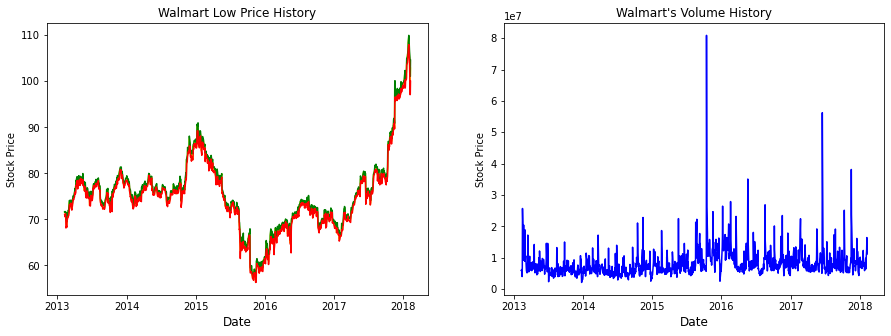

In [19]:
# Let us plot Walmart Stock Price
# First Subplot

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(walmart_df["date"], walmart_df["close"], color="yellow")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Walmart Close Price History")

# Second Subplot
ax1.plot(walmart_df["date"], walmart_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Walmart High Price History")

# Third Subplot
ax1.plot(walmart_df["date"], walmart_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Walmart Low Price History")

# Fourth Subplot
ax2.plot(walmart_df["date"], walmart_df["volume"], color="blue")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Walmart's Volume History")

plt.show()

In [20]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

In [21]:
forecast_col = 'close'#choosing which column to forecast
forecast_out = 50 #how far to forecast 
test_size = 0.2; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(walmart_df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in

learner = linear_model.LinearRegression(); #initializing linear regression model
learner.fit(X_train,Y_train); #training the linear regression model

score=learner.score(X_test,Y_test);#testing the linear regression model
forecast= learner.predict(X_lately); #set that will contain the forecasted data

response={};#creting json object
response['test_score']=score; 
response['forecast_set']=forecast;

print(response);

{'test_score': 0.4632540709249048, 'forecast_set': array([ 96.40680233,  96.54721376,  97.28671393,  96.9778088 ,
        97.09013794,  96.77187204,  97.5394545 ,  97.0246126 ,
        96.55657452,  96.341277  ,  96.69698594,  96.48168842,
        97.47392917,  96.88420118,  96.86547966,  97.60497983,
        98.44744839,  98.40064458,  97.75475202,  97.89516345,
        98.78443581,  98.87804343,  99.00909409,  98.40064458,
        98.25087239,  99.0558979 ,  99.14014476,  99.6924297 ,
       101.07782244,  99.9358095 ,  99.26183466,  99.58946132,
       100.38512607, 100.21663236, 102.09814547, 103.59586734,
       103.86732943, 104.67235494, 105.09358922, 104.99062084,
       105.74884254, 107.42441889, 108.51026726, 106.80660862,
       105.74884254, 104.73788028, 103.76436106,  99.65498665,
       100.41320835, 102.23855689])}


Text(0.5, 1.0, 'Walmart actual Close Price')

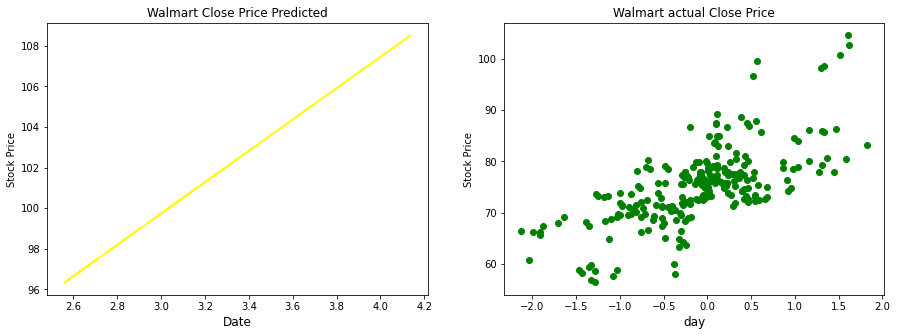

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(X_lately, forecast, color="yellow")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Walmart Close Price Predicted")

ax2.scatter(X_test, Y_test, color="green")
ax2.set_xlabel("day", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Walmart actual Close Price")



In [23]:
score

0.4632540709249048